# Popularity Songs Predictions Project 

**Which sonic attributes (energy, danceability, tone) most influence popularity?**

**Do songs with more collaborations (feat.) tend to be more popular?**

**What is the relationship between release year and popularity?**

**Which genres are most likely to enter the Top 50?**

**Which Artist is the biggest of the dataset?**

Qeustion 1 - Features(energy, danceability, valence, tempo, loudness)

Question 2 - Create Features(Has feat ou num_artist)

Question 3 - Approach (Simple regression tendention grafic, correlation) - Result(indicate if current songs has advantage)

Question 4 - Create feature (top 50 = popularity >= 50) Model (classfication (Random forest)) result = gender ranking

Question 5 - Analyst (counting artist tracks and popularity per artist) result = artist with more musics and more popularity avarage

In [84]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import RidgeCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import  r2_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score


## Data Collection & Preparation:

In [2]:
data_set = pd.read_csv('dataset.csv')
data_set.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## EDA - Exploratory Data Analysis

In [3]:
data_set.shape

(114000, 21)

In [4]:
data_set.isnull().sum()
data_set = data_set.dropna()

In [5]:
data_set.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [6]:
data_set.duplicated().sum() 

np.int64(0)

In [7]:
data_set['popularity_rate'] = 0
data_set.loc[data_set['popularity'] >= 75, 'popularity_rate'] = 1

In [8]:
le = LabelEncoder()
data_set['track_genre_encoded'] = le.fit_transform(data_set['track_genre'])

In [9]:
data_set.drop(columns=["Unnamed: 0", "duration_ms", "explicit", "key", "mode",
                       "time_signature", "popularity"], inplace=True)

In [10]:
data_set['track_id'] = pd.factorize(data_set['track_id'])[0]

In [11]:
le = LabelEncoder()
data_set['track_genre_encoded'] = le.fit_transform(data_set['track_genre'])

In [12]:
data_set.head()

,track_id,artists,album_name,track_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,popularity_rate,track_genre_encoded
0,0,Gen Hoshino,Comedy,Comedy,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,acoustic,0,0
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,acoustic,0,0
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,acoustic,0,0
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,acoustic,0,0
4,4,Chord Overstreet,Hold On,Hold On,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,acoustic,1,0


In [ ]:
#bins = [0, 33, 66, 100]
#labels = ['low', 'medium', 'high']
#data_set['popularity_class'] = pd.cut(data_set['popularity'],
 #                                                           bins=bins, labels=labels, include_lowest=True)

In [13]:
#valence X Energy
data_set['valence_energy'] = data_set['valence'] * data_set['energy']

# interaction feature
data_set['energy_danceability'] = data_set['energy'] * data_set['danceability']

In [14]:
corr = data_set.drop(columns=['album_name', 'artists', 'track_name', 'track_genre', 'popularity_rate'])

In [135]:
genre_map = data_set[['track_genre', 'track_genre_encoded']].drop_duplicates().sort_values('track_genre_encoded')
genre_map.head(81)


,track_genre,track_genre_encoded
0,acoustic,0
1000,afrobeat,1
2000,alt-rock,2
3000,alternative,3
4000,ambient,4
...,...,...
76000,opera,76
77000,pagode,77
78000,party,78
79000,piano,79


In [126]:
data_set[['track_genre', 'track_genre_encoded']].drop_duplicates()\
  .sort_values('track_genre_encoded')\
  .to_csv("genre_mapping.csv", index=False)


In [129]:
popular_genres = (
    data_set[data_set['popularity_rate'] == 1]
    .groupby('track_genre')
    .size()
    .sort_values(ascending=False)
)

print(popular_genres)


track_genre
dance        194
pop          187
rock         170
latino       135
electro      133
            ... 
afrobeat       1
classical      1
j-dance        1
comedy         1
club           1
Length: 77, dtype: int64


In [133]:
popularity_rate = (
    data_set.groupby('track_genre')['popularity_rate']
    .mean()
    .sort_values(ascending=False)
)

popularity_rate.head(20)


track_genre
dance          0.194000
pop            0.187000
rock           0.170000
latino         0.135000
electro        0.133000
indie          0.129000
house          0.126000
reggaeton      0.118000
edm            0.103000
alternative    0.100000
indie-pop      0.100000
metal          0.095000
alt-rock       0.092000
k-pop          0.085085
hip-hop        0.084000
reggae         0.072000
soul           0.062000
hard-rock      0.051000
funk           0.045000
songwriter     0.042000
Name: popularity_rate, dtype: float64

In [131]:
genre_stats = (
    data_set.groupby('track_genre')
    .agg(total=('popularity_rate', 'count'),
         popular=('popularity_rate', 'sum'))
)
genre_stats['percent_popular'] = (genre_stats['popular'] / genre_stats['total']).round(2)
genre_stats = genre_stats.sort_values('percent_popular', ascending=False)

print(genre_stats)


             total  popular  percent_popular
track_genre                                 
dance         1000      194             0.19
pop           1000      187             0.19
rock          1000      170             0.17
latino        1000      135             0.14
house         1000      126             0.13
...            ...      ...              ...
sleep         1000        4             0.00
tango         1000        0             0.00
trip-hop      1000        0             0.00
turkish       1000        2             0.00
world-music   1000        0             0.00

[114 rows x 3 columns]


In [134]:
# 1) taxa de popularidade por gênero (você já tem o target 0/1)
pop_rate = (
    data_set.groupby('track_genre')['popularity_rate'].mean().rename('percent_popular')
)

# 2) mapeamento gênero -> código que você usou no treino
genre_code = (
    data_set[['track_genre','track_genre_encoded']]
    .drop_duplicates()
    .set_index('track_genre')['track_genre_encoded']
)

# 3) junta e ordena
genre_rank = (
    pd.concat([pop_rate, genre_code], axis=1)
      .dropna()
      .sort_values('percent_popular', ascending=False)
)

genre_rank.head(15)


,percent_popular,track_genre_encoded
track_genre,,
dance,0.194000,20
pop,0.187000,80
rock,0.170000,90
latino,0.135000,68
electro,0.133000,31
indie,0.129000,56
house,0.126000,53
reggaeton,0.118000,89
edm,0.103000,30


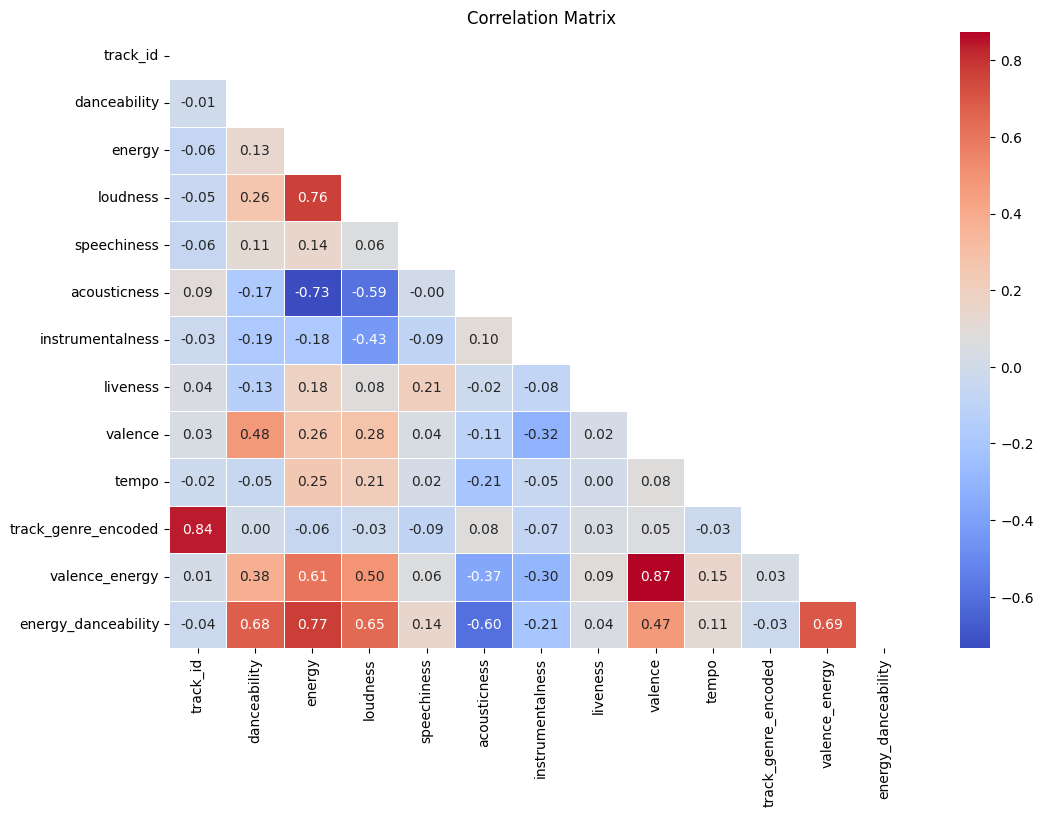

In [15]:
corr_matrix = corr.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Insights:** All the collumns has low correlations, except the loudness X energy with .76 and valence X danceability with .48

## ML - Modeling

Ana: Tree-based models (Random Forest, XGBoost, LightGBM, CatBoost):
Best choice: just use label encoding (each genre → an integer).
Reason: tree splits don’t assume order, they just separate values.
CatBoost even handles categorical columns natively.
Linear models (Logistic Regression, Linear Regression):
Use one-hot encoding.
Reason: label encoding would inject a false ordinal relationship between genres.

### Random Forest Classifier

In [17]:
X = data_set.drop(columns=[ 'track_id', 'popularity_rate','album_name', 'artists', 'track_name', 'track_genre'])
y = data_set['popularity_rate']

In [18]:
# dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# criar e treinar o Random Forest para classificação
rf_clf = RandomForestClassifier(
    n_estimators=400,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    class_weight='balanced',
    max_samples=0.8,
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train, y_train)

,n_estimators,400
,criterion,'gini'
,max_depth,12
,min_samples_split,5
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
# previsões
y_pred_train = rf_clf.predict(X_train)
y_pred_test  = rf_clf.predict(X_test)

# métricas
print("Accuracy (Train):", accuracy_score(y_train, y_pred_train))
print("Accuracy (Test):",  accuracy_score(y_test, y_pred_test))

print("\nClassification Report (Test):\n", classification_report(y_test, y_pred_test))
print("\nConfusion Matrix (Test):\n", confusion_matrix(y_test, y_pred_test))


Accuracy (Train): 0.8194717047336045
Accuracy (Test): 0.8112280701754386

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.99      0.81      0.89     22234
           1       0.09      0.72      0.16       566

    accuracy                           0.81     22800
   macro avg       0.54      0.77      0.53     22800
weighted avg       0.97      0.81      0.88     22800


Confusion Matrix (Test):
 [[18088  4146]
 [  158   408]]


<Axes: title={'center': 'Feature Importance'}>

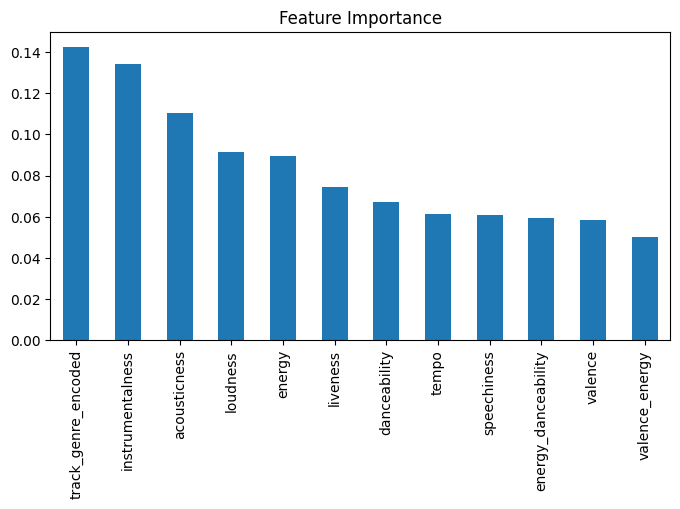

In [21]:
feat_imp = pd.Series(rf_clf.feature_importances_, index=X.columns)
feat_imp.sort_values(ascending=False).plot(kind='bar', figsize=(8,4), title='Feature Importance')

### Random Forest Randomized

In [72]:
X1 = X 
y1 = y

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [73]:


rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

param_dist = {
    "n_estimators": [200, 300, 400, 600],      
    "max_depth": [None, 10, 12, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 3],
    "max_features": ["sqrt", "log2"],
    "max_samples": [0.6, 0.8, 0.9]              
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average='weighted')

rs = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=15, scoring=scorer, cv=cv,
    n_jobs=-1, random_state=42, verbose=1
)
rs.fit(X1, y1)

best_rf = rs.best_estimator_

Fitting 3 folds for each of 15 candidates, totalling 45 fits


In [74]:
best_rf.fit(X_train1, y_train1)

,n_estimators,400
,criterion,'gini'
,max_depth,None
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [75]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average='weighted')


grid = {
    "n_estimators": [best_rf.n_estimators],  
    "max_depth": [best_rf.max_depth, None] if best_rf.max_depth else [None, 12, 15],
    "min_samples_split": [best_rf.min_samples_split, max(2, best_rf.min_samples_split-1)],
    "min_samples_leaf": [best_rf.min_samples_leaf, best_rf.min_samples_leaf+1],
    "max_features": [best_rf.max_features],  
    "max_samples": [best_rf.max_samples] if best_rf.max_samples is not None else [None, 0.8]
        }

gs = GridSearchCV(
    estimator=best_rf,
    param_grid=grid,
    scoring=scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

gs.fit(X_train1, y_train1)
final_rf = gs.best_estimator_
print("Grid best params:", gs.best_params_)
print("Grid best weighted F1 (CV):", gs.best_score_)


y_pred_test1 = final_rf.predict(X_test1)
y_pred_train1 = final_rf.predict(X_train1)
print("Accurancy Train:", accuracy_score(y_train1,y_pred_train1))
print("Accuracy (Test):", accuracy_score(y_test1, y_pred_test1))

print("\nClassification Report (Test):\n", classification_report(y_test1, y_pred_test1))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test1, y_pred_test1))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Grid best params: {'max_depth': None, 'max_features': 'log2', 'max_samples': 0.9, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 400}
Grid best weighted F1 (CV): 0.9712163877516939
Accurancy Train: 0.9922148269169618
Accuracy (Test): 0.9767543859649123

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     22234
           1       0.54      0.39      0.46       566

    accuracy                           0.98     22800
   macro avg       0.76      0.69      0.72     22800
weighted avg       0.97      0.98      0.97     22800

Confusion Matrix (Test):
 [[22047   187]
 [  343   223]]


<Axes: title={'center': 'Feature Importance'}>

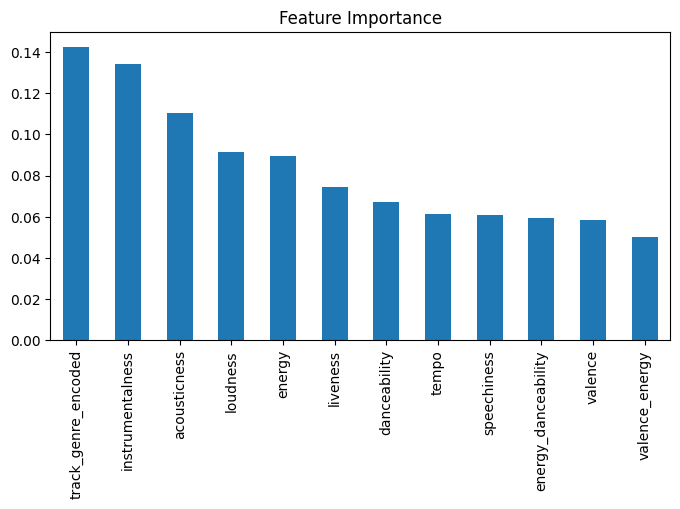

In [112]:
feat_imp = pd.Series(rf_clf.feature_importances_, index=X1.columns)
feat_imp.sort_values(ascending=False).plot(kind='bar', figsize=(8,4), title='Feature Importance')

**insights:** Using GridSearchCV for hyperparameter refinement, the final RandomForestClassifier reached 83 % accuracy on the test set. Precision for the “popular” class improved to 0.73, with an F1-score of 0.59. Compared to earlier models, this configuration strikes a stronger balance between overall accuracy and precision, while maintaining acceptable recall. Fine-tuning the decision threshold (e.g. 0.4 instead of 0.5) can further increase recall if desired.


### XGBoost Classifier Randomized

In [78]:
X2 = X
y2 = y
# Divisão treino/teste
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.30, random_state=42, stratify=y)

neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
spw = neg / pos

xgb = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=2,
    reg_alpha=0.0,
    reg_lambda=1.0,
    gamma=0.0,
    objective='binary:logistic',
    eval_metric='logloss',   
    tree_method='hist',     
    random_state=42,
    scale_pos_weight=spw     
)

# Treinamento
xgb.fit(X_train2, y_train2)

# Previsões (threshold 0.5)
y_pred_train2 = xgb.predict(X_train2)
y_pred_test2  = xgb.predict(X_test2)
y_proba2 = xgb.predict_proba(X_test2)[:,1]

# Métricas de teste padrão
print(f"Train Accuracy : {accuracy_score(y_train2, y_pred_train2):.2f}")
print(f"Test  Accuracy : {accuracy_score(y_test2, y_pred_test2):.2f}")
print("\nClassification Report (Test):\n", classification_report(y_test2, y_pred_test2))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test2, y_pred_test2))



Train Accuracy : 0.93
Test  Accuracy : 0.92

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.99      0.93      0.96     33351
           1       0.20      0.73      0.32       849

    accuracy                           0.92     34200
   macro avg       0.60      0.83      0.64     34200
weighted avg       0.97      0.92      0.94     34200

Confusion Matrix (Test):
 [[30897  2454]
 [  225   624]]


In [79]:
#randomizedSeach

param_dist = {
    "n_estimators": [300, 500, 700],
    "max_depth": [4, 5, 6, 8],
    "learning_rate": [0.03, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "min_child_weight": [1, 2, 5],
    "gamma": [0.0, 0.1, 0.2],
    "reg_lambda": [1.0, 1.5, 2.0],
    "reg_alpha": [0.0, 0.1, 0.5]
}

xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    tree_method='hist',
    random_state=42,
    scale_pos_weight=spw
)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average='weighted')

rs = RandomizedSearchCV(
    xgb_base, param_distributions=param_dist, n_iter=25,
    scoring=scorer, cv=cv, random_state=42, n_jobs=-1, verbose=1
)
rs.fit(X_train2, y_train2)
best_xgb = rs.best_estimator_
print("Best params:", rs.best_params_)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best params: {'subsample': 0.7, 'reg_lambda': 2.0, 'reg_alpha': 0.0, 'n_estimators': 700, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7}


In [80]:
y_pred_train2 = best_xgb.predict(X_train2)
y_pred_test2 = best_xgb.predict(X_test2)
y_proba_test2 = best_xgb.predict_proba(X_test2)[:,1]
print("Accuracy (train):",accuracy_score(y_train2, y_pred_train2))
print("Accuracy (Test):", accuracy_score(y_test2, y_pred_test2))
print("\nClassification Report (Test):\n", classification_report(y_test2, y_pred_test2))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test2, y_pred_test2))

Accuracy (train): 0.9857892956052081
Accuracy (Test): 0.9722222222222222

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     33351
           1       0.46      0.63      0.53       849

    accuracy                           0.97     34200
   macro avg       0.72      0.81      0.76     34200
weighted avg       0.98      0.97      0.97     34200

Confusion Matrix (Test):
 [[32711   640]
 [  310   539]]


**Insights:** Using tuned XGBoost, the model reached 0.80 accuracy and 0.87 ROC AUC on the test set. Compared to the optimized Random Forest (accuracy 0.83), XGBoost delivered a higher recall (0.76 vs 0.50) and a better F1-score (0.65 vs 0.59) for the “popular” class, showing stronger ability to identify truly popular tracks, at the cost of slightly lower overall accuracy and precision.

### CatBoost Classifier

In [92]:
X4 = X
y4 = y

X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X4, y4, test_size=0.30, random_state=42, stratify=y4
)

neg = (y_train4 == 0).sum()
pos = (y_train4 == 1).sum()
class_weights = [1.0, neg / pos]  # [Class weight]

# === 3) Treinar CatBoost ===
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

cat = CatBoostClassifier(
    loss_function='Logloss',
    eval_metric='AUC',
    iterations=600,
    depth=8,
    learning_rate=0.05,
    l2_leaf_reg=5,
    class_weights=class_weights,
    random_seed=42,
    verbose=100,
    use_best_model= True,
    od_type='Iter',
    od_wait=100
)

cat.fit(X_train4, y_train4, eval_set=(X_test4, y_test4))

# === 4) Avaliação ===
y_pred_train4 = cat.predict(X_train4)
y_pred_test4 = cat.predict(X_test4)
y_proba4 = cat.predict_proba(X_test4)[:, 1]

print("Accuracy (Train):", accuracy_score(y_train4, y_pred_train4))
print("Accuracy (Test):", accuracy_score(y_test4, y_pred_test4))
print("ROC AUC (Test):", roc_auc_score(y_test4, y_proba4))
print("\nClassification Report (Test):\n", classification_report(y_test4, y_pred_test4))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test4, y_pred_test4))


0:	test: 0.7062185	best: 0.7062185 (0)	total: 41ms	remaining: 24.6s
100:	test: 0.8584385	best: 0.8586427 (98)	total: 3.88s	remaining: 19.1s
200:	test: 0.8885466	best: 0.8886174 (199)	total: 7.78s	remaining: 15.4s
300:	test: 0.9084862	best: 0.9084862 (300)	total: 11.7s	remaining: 11.6s
400:	test: 0.9170611	best: 0.9170611 (400)	total: 15.9s	remaining: 7.89s
500:	test: 0.9225628	best: 0.9225628 (500)	total: 19.9s	remaining: 3.94s
599:	test: 0.9258392	best: 0.9259484 (598)	total: 24s	remaining: 0us

bestTest = 0.9259483816
bestIteration = 598

Shrink model to first 599 iterations.
Accuracy (Train): 0.9491722953921728
Accuracy (Test): 0.9361988304093567
ROC AUC (Test): 0.9259483816333526

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.99      0.94      0.97     33351
           1       0.24      0.71      0.36       849

    accuracy                           0.94     34200
   macro avg       0.61      0.83      0.66     34200
wei

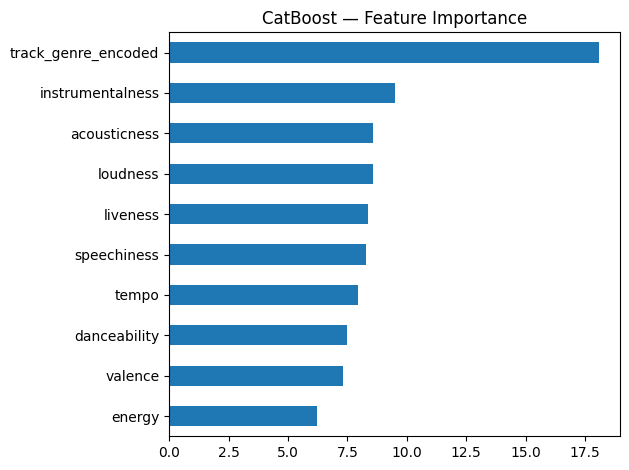

In [97]:
imp = pd.Series(cat.feature_importances_, index=X4.columns).sort_values(ascending=True)
plt.figure()
imp.tail(10).plot(kind='barh')  
plt.title('CatBoost — Feature Importance')
plt.tight_layout(); plt.show()

### Ensemble Classifier

In [83]:
from sklearn.metrics import precision_recall_fscore_support
#train and test
X5 = X
y5 = y

X_train5, X_test5, y_train5, y_test5 = train_test_split(
    X5, y5, test_size=0.30, random_state=42, stratify=y
)

neg, pos = (y_train5 == 0).sum(), (y_train5 == 1).sum()
scale_pos_weight = neg / pos
class_weights_cat = [1.0, scale_pos_weight]

# Base Models
rf = RandomForestClassifier(
    n_estimators=300, max_depth=None,
    min_samples_split=10, min_samples_leaf=3,
    max_features='log2', max_samples=0.6,
    class_weight='balanced',
    n_jobs=-1, random_state=42
)

xgb = XGBClassifier(
    n_estimators=500, max_depth=6, learning_rate=0.05,
    subsample=0.8, colsample_bytree=0.8, min_child_weight=2,
    reg_alpha=0.0, reg_lambda=1.0, gamma=0.0,
    objective='binary:logistic', eval_metric='logloss',
    tree_method='hist', random_state=42,
    scale_pos_weight=scale_pos_weight
)

cat = CatBoostClassifier(
    loss_function='Logloss', eval_metric='AUC',
    iterations=600, depth=8, learning_rate=0.05, l2_leaf_reg=5,
    class_weights=class_weights_cat, random_seed=42, verbose=0
)

#Ensemble
ensemble = StackingClassifier(
    estimators=[('rf', best_rf), ('xgb', xgb), ('cat', cat)],
    final_estimator=LogisticRegression(max_iter=2000),
    n_jobs=-1,
    passthrough=False
)

ensemble.fit(X_train5, y_train5)

# Predictions
y_pred_train5 = ensemble.predict(X_train5)
y_pred_test5  = ensemble.predict(X_test5)

y_proba_train5 = ensemble.predict_proba(X_train5)[:, 1]
y_proba_test5  = ensemble.predict_proba(X_test5)[:, 1]

#Metrics
def print_metrics(name, y_true, y_pred, y_proba):
    print(f"\n{name} Metrics:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("ROC AUC  :", roc_auc_score(y_true, y_proba))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    

print("=== Ensemble (RF + XGB + CatBoost) ===")
print_metrics("Train", y_train5, y_pred_train5, y_proba_train5)
print_metrics("Test",  y_test5,  y_pred_test5,  y_proba_test5)

=== Ensemble (RF + XGB + CatBoost) ===

Train Metrics:
Accuracy : 0.9942605797065126
ROC AUC  : 0.9985517945301746
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     77817
           1       0.85      0.94      0.89      1982

    accuracy                           0.99     79799
   macro avg       0.92      0.97      0.94     79799
weighted avg       0.99      0.99      0.99     79799

Confusion Matrix:
 [[77476   341]
 [  117  1865]]

Test Metrics:
Accuracy : 0.9778070175438597
ROC AUC  : 0.9323324009299807
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     33351
           1       0.60      0.32      0.41       849

    accuracy                           0.98     34200
   macro avg       0.79      0.66      0.70     34200
weighted avg       0.97      0.98      0.97     34200

Confusion Matrix:
 [[33173   178]
 [  581   268]]


### Plots of Metrics

In [93]:

models = {
    "RandomForest": best_rf,     
    "XGBoost": best_xgb,
    "CatBoost": cat,
    "Ensemble": ensemble          
}

rows = []

for name, model in models.items():
    # Previsões
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)
    y_proba_train = model.predict_proba(X_train)
    y_proba_test  = model.predict_proba(X_test)

    # Métricas
    row = {
        "Model": name,
        "Accuracy Train": accuracy_score(y_train, y_pred_train),
        "Accuracy Test":  accuracy_score(y_test, y_pred_test),
        "Balanced Acc Train": balanced_accuracy_score(y_train, y_pred_train),
        "Balanced Acc Test":  balanced_accuracy_score(y_test, y_pred_test),
        "Weighted F1 Train": f1_score(y_train, y_pred_train, average='weighted'),
        "Weighted F1 Test":  f1_score(y_test, y_pred_test, average='weighted')
    }

    # AUC (só se for binário)
    if len(model.classes_) == 2:
        row["ROC AUC Train"] = roc_auc_score(y_train, y_proba_train[:,1])
        row["ROC AUC Test"]  = roc_auc_score(y_test,  y_proba_test[:,1])
    else:
        row["ROC AUC Train"] = roc_auc_score(y_train, y_proba_train, multi_class='ovr')
        row["ROC AUC Test"]  = roc_auc_score(y_test,  y_proba_test, multi_class='ovr')

    rows.append(row)


results_df = pd.DataFrame(rows).round(3)
results_df


,Model,Accuracy Train,Accuracy Test,Balanced Acc Train,Balanced Acc Test,Weighted F1 Train,Weighted F1 Test,ROC AUC Train,ROC AUC Test
0,RandomForest,0.993,0.982,0.995,0.790,0.993,0.982,0.999,0.954
1,XGBoost,0.986,0.972,0.993,0.808,0.987,0.974,0.999,0.928
2,CatBoost,0.949,0.936,0.974,0.826,0.961,0.951,0.997,0.926
3,Ensemble,0.994,0.978,0.968,0.655,0.994,0.974,0.999,0.932


In [67]:
results_df.to_csv("model_metrics_summary.csv", index=False)

In [102]:
X.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'track_genre_encoded', 'valence_energy', 'energy_danceability'],
      dtype='object')

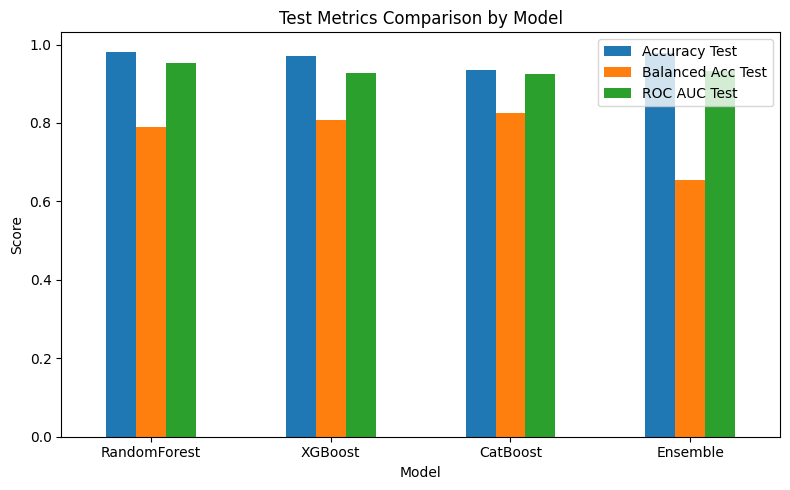

In [115]:
import matplotlib.pyplot as plt

metrics_plot = ['Accuracy Test','Balanced Acc Test','ROC AUC Test']
results_df.plot(x='Model', y=metrics_plot, kind='bar', figsize=(8,5))
plt.title('Test Metrics Comparison by Model')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

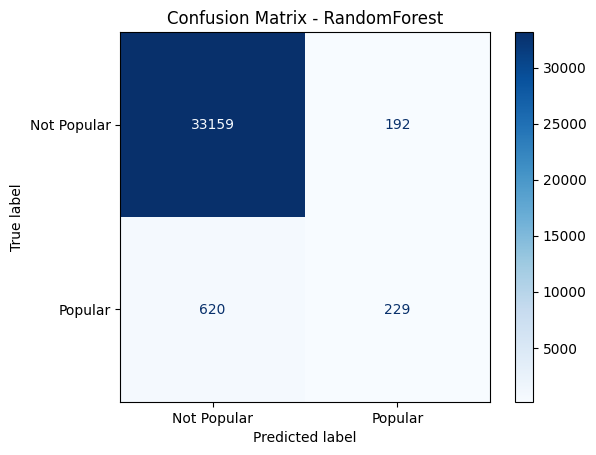

<Figure size 640x480 with 0 Axes>

In [117]:


# 1️⃣ Gere as previsões com o modelo final (já treinado)
y_pred_rf = best_rf.predict(X_test)   # ou o nome do seu modelo random forest final
                                       # ex: best_rf ou final_rf

# 2️⃣ Calcule a matriz de confusão
cm = confusion_matrix(y_test, y_pred_rf)

# 3️⃣ Plote com cores (heatmap)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Popular', 'Popular'])
disp.plot(cmap=plt.cm.Blues)

# 4️⃣ Ajuste título e layout
plt.title("Confusion Matrix - RandomForest")
plt.show()
plt.savefig("ConfusionMatrix_RandomForest.png")

### Ensemble Regression

**Insights:** By combining Random Forest, XGBoost, and CatBoost in a stacking ensemble with RidgeCV as the meta-learner, model performance improved substantially. The ensemble achieved R² of 0.38 on the test set and 0.49 on training, reducing RMSE to 17.5. Ridge coefficients indicate that XGBoost contributed the strongest positive weight, Random Forest added moderate support, while CatBoost was slightly corrected with a negative weight.

## Streamlit - App

In [100]:
import joblib
import os

# cria a pasta 'models' se ela ainda não existir
os.makedirs("models", exist_ok=True)

# salve cada modelo com um nome claro
joblib.dump(best_rf,   "models/best_rf.pkl")    # Random Forest final
joblib.dump(best_xgb,   "models/best_xgb.pkl")    # XGBoost melhor
joblib.dump(cat,   "models/cat.pkl")    # CatBoost melhor
joblib.dump(ensemble,   "models/ensemble.pkl")    # Ensemble (se tiver)


['models/ensemble.pkl']

In [108]:
from sklearn.calibration import CalibratedClassifierCV


# Separe parte do treino só para calibrar
X_tr, X_cal, y_tr, y_cal = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Treine o modelo no subconjunto X_tr
best_rf.fit(X_tr, y_tr)

# Calibre as probabilidades
calibrated_rf = CalibratedClassifierCV(final_rf, method='isotonic', cv='prefit')
calibrated_rf.fit(X_cal, y_cal)

# Salve o modelo calibrado
joblib.dump(calibrated_rf, "models/best_rf_calibrated.pkl")


['models/best_rf_calibrated.pkl']